# Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb

from itertools import product
import itertools
from collections import OrderedDict
import operator
import re
from math import sqrt
import pickle

# Data Preprocessing

In [2]:
original_df = pd.read_csv('fifa-18-demo-player-dataset/CompleteDataset.csv', error_bad_lines=False)

/Users/paulfournier/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning:

Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.



In [3]:
processed_df = original_df.copy()
#drop the colums that cannot be used
processed_df = processed_df.drop(['Photo', 'Flag', 'Club Logo', 'Special', 'ID'], 1)

In [4]:
#Convert the numerical values from string type to integer type. 
def strToInt(string):
    try:
        integer = float(string)
        return integer
    except ValueError:
        return np.nan
    
processed_df['Acceleration'] = processed_df['Acceleration'].apply(strToInt)
processed_df['Aggression'] = processed_df['Aggression'].apply(strToInt)
processed_df['Agility'] = processed_df['Agility'].apply(strToInt)
processed_df['Balance'] = processed_df['Balance'].apply(strToInt)
processed_df['Ball control'] = processed_df['Ball control'].apply(strToInt)
processed_df['Composure'] = processed_df['Composure'].apply(strToInt)
processed_df['Crossing'] = processed_df['Crossing'].apply(strToInt)
processed_df['Curve'] = processed_df['Curve'].apply(strToInt)
processed_df['Dribbling'] = processed_df['Dribbling'].apply(strToInt)
processed_df['Finishing'] = processed_df['Finishing'].apply(strToInt)
processed_df['Free kick accuracy'] = processed_df['Free kick accuracy'].apply(strToInt)
processed_df['GK diving'] = processed_df['GK diving'].apply(strToInt)
processed_df['GK handling'] = processed_df['GK handling'].apply(strToInt)
processed_df['GK kicking'] = processed_df['GK kicking'].apply(strToInt)
processed_df['GK positioning'] = processed_df['GK positioning'].apply(strToInt)
processed_df['GK reflexes'] = processed_df['GK reflexes'].apply(strToInt)
processed_df['Heading accuracy'] = processed_df['Heading accuracy'].apply(strToInt)
processed_df['Interceptions'] = processed_df['Interceptions'].apply(strToInt)
processed_df['Jumping'] = processed_df['Jumping'].apply(strToInt)
processed_df['Long passing'] = processed_df['Long passing'].apply(strToInt)
processed_df['Long shots'] = processed_df['Long shots'].apply(strToInt)
processed_df['Marking'] = processed_df['Marking'].apply(strToInt)
processed_df['Penalties'] = processed_df['Penalties'].apply(strToInt)
processed_df['Positioning'] = processed_df['Positioning'].apply(strToInt)
processed_df['Reactions'] = processed_df['Reactions'].apply(strToInt)
processed_df['Short passing'] = processed_df['Short passing'].apply(strToInt)
processed_df['Shot power'] = processed_df['Shot power'].apply(strToInt)
processed_df['Sliding tackle'] = processed_df['Sliding tackle'].apply(strToInt)
processed_df['Sprint speed'] = processed_df['Sprint speed'].apply(strToInt)
processed_df['Stamina'] = processed_df['Stamina'].apply(strToInt)
processed_df['Standing tackle'] = processed_df['Standing tackle'].apply(strToInt)
processed_df['Strength'] = processed_df['Strength'].apply(strToInt)
processed_df['Vision'] = processed_df['Vision'].apply(strToInt)
processed_df['Volleys'] = processed_df['Volleys'].apply(strToInt)
processed_df['CAM'] = processed_df['CAM'].apply(strToInt)
processed_df['CB'] = processed_df['CB'].apply(strToInt)
processed_df['CDM'] = processed_df['CDM'].apply(strToInt)
processed_df['CF'] = processed_df['CF'].apply(strToInt)
processed_df['CM'] = processed_df['CM'].apply(strToInt)
processed_df['LAM'] = processed_df['LAM'].apply(strToInt)
processed_df['LB'] = processed_df['LB'].apply(strToInt)
processed_df['LCM'] = processed_df['LCM'].apply(strToInt)
processed_df['LDM'] = processed_df['LDM'].apply(strToInt)
processed_df['LF'] = processed_df['LF'].apply(strToInt)
processed_df['LM'] = processed_df['LM'].apply(strToInt)
processed_df['LS'] = processed_df['LS'].apply(strToInt)
processed_df['LW'] = processed_df['LW'].apply(strToInt)
processed_df['LWB'] = processed_df['LWB'].apply(strToInt)
processed_df['RAM'] = processed_df['RAM'].apply(strToInt)
processed_df['RB'] = processed_df['RB'].apply(strToInt)
processed_df['RCB'] = processed_df['RCB'].apply(strToInt)
processed_df['RCM'] = processed_df['RCM'].apply(strToInt)
processed_df['RDM'] = processed_df['RDM'].apply(strToInt)
processed_df['RF'] = processed_df['RF'].apply(strToInt)
processed_df['RM'] = processed_df['RM'].apply(strToInt)
processed_df['RS'] = processed_df['RS'].apply(strToInt)
processed_df['RW'] = processed_df['RW'].apply(strToInt)
processed_df['RWB'] = processed_df['RWB'].apply(strToInt)
processed_df['ST'] = processed_df['ST'].apply(strToInt)

In [5]:
#Convert wages and values to floats
def strToFloat(string):
    if string[-1] == 'M':
        value = float(string[1:-1])*1000000
    elif string[-1] == 'K':
        value = float(string[1:-1])*1000
    else:
        value = float(string[1:])
    return value
        
processed_df['Value'] = processed_df['Value'].apply(strToFloat)
processed_df['Wage'] = processed_df['Wage'].apply(strToFloat)

In [6]:
processed_df.head()

,id,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Acceleration,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,95500000.0,565000.0,89.0,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,Argentina,93,93,FC Barcelona,105000000.0,565000.0,92.0,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,Brazil,92,94,Paris Saint-Germain,123000000.0,280000.0,94.0,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,Uruguay,92,92,FC Barcelona,97000000.0,510000.0,88.0,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,Germany,92,92,FC Bayern Munich,61000000.0,230000.0,58.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis

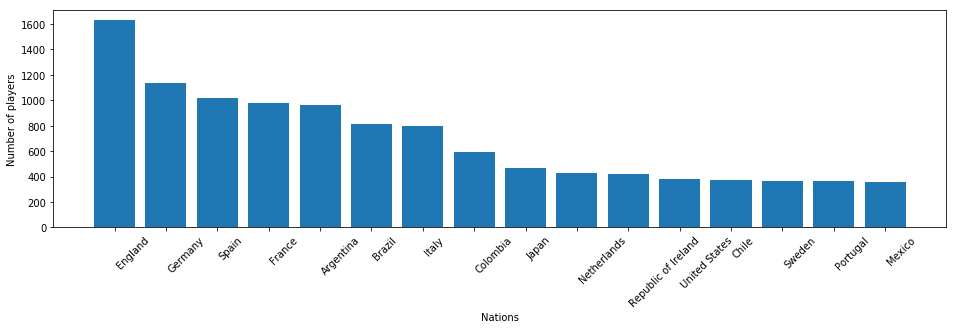

In [7]:
#Number of player per country
nations = {'Nation': 0}
def count_nations(nation):
    #Count the players per country
    if (nation in nations):
        nations[nation] = nations[nation] + 1
    else:
        nations[nation] = 1

processed_df['Nationality'].apply(count_nations)
nations.pop('Nation', None)
#Sort and take the top 10%
sorted_nations = OrderedDict(sorted(nations.items(), key=lambda x: x[1], reverse=True))
sorted_nations = dict((k, sorted_nations[k]) for k in list(sorted_nations.keys())[0:int(len(sorted_nations)/10)])

fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(111)
ax.bar(range(len(sorted_nations)), list(sorted_nations.values()))
plt.xticks(range(len(sorted_nations)), list(sorted_nations.keys()), rotation=45,  ha='left')
plt.xlabel('Nations')
plt.ylabel('Number of players')
plt.show()


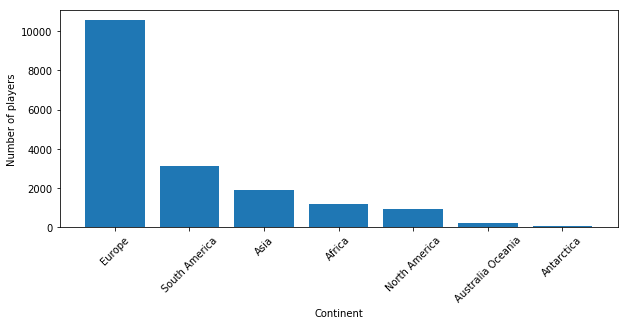

In [8]:
#Number of player per continent
continent_list = {
    'Africa' : ['Algeria','Angola','Benin','Botswana','Burkina','Burundi','Cameroon','Cape Verde','Central African Republic','Chad','Comoros','Congo','DR Congo','Djibouti','Egypt','Equatorial Guinea','Eritrea','Ethiopia','Gabon','Gambia','Ghana','Guinea','Guinea Bissau','Ivory Coast','Kenya','Lesotho','Liberia','Libya','Madagascar','Malawi','Mali','Mauritania','Mauritius','Morocco','Mozambique','Namibia','Niger','Nigeria','Rwanda','Sao Tome and Principe','Senegal','Seychelles','Sierra Leone','Somalia','South Africa','South Sudan','Sudan','Swaziland','Tanzania','Togo','Tunisia','Uganda','Zambia','Zimbabwe','Burkina Faso'],
    'Antarctica' : ['Fiji','Kiribati','Marshall Islands','Micronesia','Nauru','New Zealand','Palau','Papua New Guinea','Samoa','Solomon Islands','Tonga','Tuvalu','Vanuatu'],
    'Asia' : ['Afghanistan','Bahrain','Bangladesh','Bhutan','Brunei','Burma (Myanmar)','Cambodia','China','China PR','East Timor','India','Indonesia','Iran','Iraq','Israel','Japan','Jordan','Kazakhstan','North Korea','South Korea','Korea Republic','Korea DPR','Kuwait','Kyrgyzstan','Laos','Lebanon','Malaysia','Maldives','Mongolia','Nepal','Oman','Pakistan','Palestine','Philippines','Qatar','Russian Federation','Saudi Arabia','Singapore','Sri Lanka','Syria','Tajikistan','Thailand','Turkey','Turkmenistan','United Arab Emirates','Uzbekistan','Vietnam','Yemen','Russia'],
    'Australia Oceania' : ['Australia','New Caledonia'],
    'Europe' : ['Albania','Andorra','Armenia','Austria','Azerbaijan','Belarus','Belgium','Bosnia Herzegovina','Bulgaria','Croatia','Cyprus','Czech Republic','Denmark','Estonia','Finland','France','FYR Macedonia','Georgia','Germany','Greece','Hungary','Iceland','Ireland','Italy','Kosovo','Latvia','Liechtenstein','Lithuania','Luxembourg','Macedonia','Malta','Moldova','Monaco','Montenegro','Netherlands','Northern Ireland','Norway','Poland','Portugal','Romania','San Marino','Scotland','Serbia','Slovakia','Slovenia','Spain','Sweden','Switzerland','Ukraine','England','Vatican City','Republic of Ireland','Wales'],
    'North America' : ['Antigua and Barbuda','Bahamas','Barbados','Belize','Canada','Costa Rica','Cuba','Dominica','Dominican Republic','El Salvador','Grenada','Guatemala','Haiti','Honduras','Jamaica','Mexico','Nicaragua','Panama','Saint Kitts and Nevis','Saint Lucia','Saint Vincent and the Grenadines','Trinidad and Tobago','United States'],
    'South America' : ['Argentina','Bolivia','Brazil','Chile','Colombia','Curacao','Ecuador','Guyana','Paraguay','Peru','Suriname','Trinidad & Tobago','Uruguay','Venezuela']
}
continents = {'Africa' : 0, 'Antarctica' : 0,'Asia' : 0, 'Australia Oceania' : 0, 'Europe' : 0, 'North America' : 0, 'South America' : 0}

def count_continent(nation):
    #Count the players per continent
    for continent in continent_list:
        if nation in continent_list[continent]:
            continents[continent] = continents[continent] + 1
            return continent
    return np.NaN

processed_df['Nationality'].apply(count_continent)
sorted_continents = OrderedDict(sorted(continents.items(), key=lambda x: x[1], reverse=True))

fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)
ax.bar(range(len(sorted_continents)), list(sorted_continents.values()))
plt.xticks(range(len(sorted_continents)), list(sorted_continents.keys()), rotation = 45)
plt.xlabel('Continent')
plt.ylabel('Number of players')
plt.show()

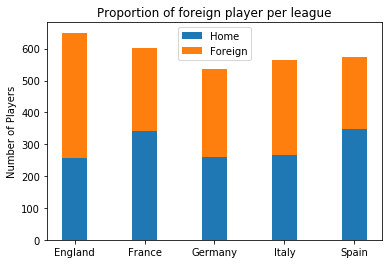

In [9]:
#Proportion of foreign player per league
club_list_per_league = {
    'England' : ['Manchester United', 'Chelsea', 'Manchester City', 'Arsenal', 'Tottenham Hotspur', 'Liverpool', 'Leicester City', 'Southampton', 'Everton', 'Swansea City', 'Stoke City', 'West Ham United', 'Watford', 'Bournemouth', 'Crystal Palace', 'West Bromwich Albion', 'Burnley', 'Newcastle United', 'Brighton & Hove Albion', 'Huddersfield Town'],
    'France' : ['Paris Saint-Germain', 'AS Monaco', 'AS Saint-Étienne', 'Olympique de Marseille', 'Olympique Lyonnais', 'OGC Nice', 'Girondins de Bordeaux', 'Stade Rennais FC', 'Montpellier Hérault SC', 'FC Nantes', 'En Avant de Guingamp', 'Amiens SC Football', 'Dijon FCO', 'Angers SCO', 'LOSC Lille', 'RC Strasbourg', 'SM Caen', 'Toulouse FC', 'ES Troyes AC', 'FC Metz'],
    'Germany' : ['FC Bayern Munich', 'Borussia Dortmund', 'Bayer 04 Leverkusen', 'FC Schalke 04', 'RB Leipzig', 'Borussia Mönchengladbach', 'TSG 1899 Hoffenheim', 'SV Werder Bremen', 'VfL Wolfsburg', 'Hertha BSC Berlin', 'Eintracht Frankfurt', 'VfB Stuttgart', 'Eintracht Braunschweig', 'FC Augsburg', '1. FSV Mainz 05', 'Hamburger SV', 'Hannover 96', 'SC Freiburg'],
    'Italy' : ['Juventus', 'Milan', 'Napoli', 'Inter', 'Roma', 'Torino', 'Lazio', 'Genoa', 'Sassuolo', 'Sampdoria', 'Fiorentina', 'Atalanta', 'Sampdoria', 'Bologna', 'Chievo Verona', 'Udinese', 'Cagliari', 'Ferrara (SPAL)', 'Crotone', 'Hellas Verona', 'Benevento Calcio'],
    'Spain' : ['Real Madrid CF', 'FC Barcelona', 'Atletico Madrid', 'Athletic Club de Bilbao','1. FC Köln', 'Villarreal CF', 'Real Sociedad', 'UD Las Palmas', 'RC Celta de Vigo', 'RCD Espanyol', 'SD Eibar', 'Valencia CF', 'Sevilla FC', 'RC Deportivo de La Coruña', 'Real Betis Balompié', 'Getafe CF', 'Girona CF', 'Deportivo Alav√©s', 'Levante UD', 'Deportivo Alavés', 'Málaga CF'],
}

two_columns = processed_df[['Nationality', 'Club']]

nationality_proportion = {'England' : [0, 0], 'France' : [0, 0], 'Germany' : [0, 0], 'Italy' : [0, 0], 'Spain' : [0, 0]}
def count_foreign_players():
    index = 0
    while (index < len(two_columns)):
        for country in club_list_per_league:
            if two_columns['Club'][index] in club_list_per_league[country]:
                if two_columns['Nationality'][index] == country:
                    nationality_proportion[country][0] = nationality_proportion[country][0] + 1
                else:
                    nationality_proportion[country][1] = nationality_proportion[country][1] + 1
        index += 1

count_foreign_players()
N = 5
home = (nationality_proportion['England'][0], nationality_proportion['France'][0], nationality_proportion['Germany'][0], nationality_proportion['Italy'][0], nationality_proportion['Spain'][0])
foreign = (nationality_proportion['England'][1], nationality_proportion['France'][1], nationality_proportion['Germany'][1], nationality_proportion['Italy'][1], nationality_proportion['Spain'][1])
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
p1 = ax.bar(ind, home, width)
p2 = ax.bar(ind, foreign, width, bottom = home)
plt.ylabel('Number of Players')
plt.title('Proportion of foreign player per league')
plt.xticks(ind, ('England', 'France', 'Germany', 'Italy', 'Spain'))
plt.yticks(np.arange(0, 700, 100))
plt.legend((p1[0], p2[0]), ('Home', 'Foreign'))
plt.show()

In [10]:
#Average player value per country
# Selecting players with age smaller then 40 
dataset = processed_df.loc[processed_df['Age'] <= 40]
country_value = dataset.groupby("Nationality")["Value"].mean()
country_value = country_value.reset_index()

data = [ dict(
        type = 'choropleth',
        locationmode = "country names",
        locations = country_value['Nationality'],
        z = country_value['Value'],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            title = 'Average<br>Player Value'),
      ) ]

layout = dict(
    title = 'Average Player Value Per Country',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map-value' )

In [11]:
#Average player wage per country
country_wage = dataset.groupby("Nationality")["Wage"].mean()
country_wage = country_wage.reset_index()

data = [ dict(
        type = 'choropleth',
        locationmode = "country names",
        locations = country_wage['Nationality'],
        z = country_wage['Wage'],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            title = 'Average<br>Player Value'),
      ) ]

layout = dict(
    title = 'Average Player Wage Per Country',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map-value' )

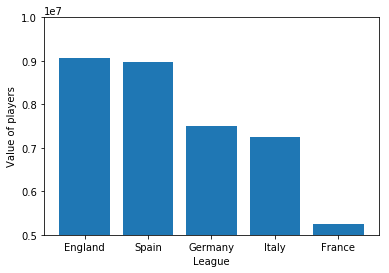

In [12]:
#Player value per league 
value_per_league = {'League': 0}
league_value = {'England' : 0, 'France' : 0, 'Germany' : 0, 'Italy' : 0, 'Spain' : 0}

def sum_values(series):
    value = series[1]

    #Count the players value per league
    for league in club_list_per_league:
        if series[0] in club_list_per_league[league]:
            league_value[league] += value
            return league
    return np.NaN

club_value = processed_df[['Club', 'Value']]
club_value.apply(sum_values, 1)
value_per_league.pop('League', None)

#Average the players value per league
for league in league_value:
    league_value[league] = league_value[league] / (float(nationality_proportion[league][0])+float(nationality_proportion[league][1]))

sorted_league_value = OrderedDict(sorted(league_value.items(), key=lambda x: x[1], reverse=True))

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.bar(range(len(sorted_league_value)), list(sorted_league_value.values()))
plt.xticks(range(len(sorted_league_value)), list(sorted_league_value.keys()))
plt.xlabel('League')
plt.ylabel('Value of players')
ax.set(ylim=(0.5e7, 1e7))
plt.show()

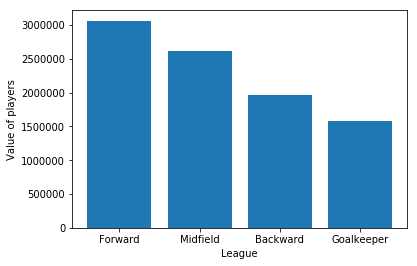

In [13]:
#Player value per position
position_list = {
    'Forward' : ['CF', 'LF', 'LS', 'LW', 'RF', 'RS', 'RW', 'ST'],
    'Midfield' : ['CAM', 'CDM', 'CM', 'LAM', 'LCM', 'LDM', 'LM', 'RAM', 'RCB', 'RCM', 'RDM', 'RM'],
    'Backward' : ['CB', 'LB', 'LCB', 'LWB', 'RB', 'RCB', 'RWB'],
    'Goalkeeper' : ['GK'],
}
sum_per_position = {'Forward': 0, 'Midfield': 0, 'Backward': 0, 'Goalkeeper': 0}
player_per_position = {'Forward': 0, 'Midfield': 0, 'Backward': 0, 'Goalkeeper': 0}
average_per_position = {'Forward': 0, 'Midfield': 0, 'Backward': 0, 'Goalkeeper': 0}

def sum_values(series):
    already_counted = [0, 0, 0, 0] #Array to avoid having repeated values in the average
    preferred_position_list = re.sub("[^\w]", " ",  series[0]).split() #Split the preferred positions
    value = series[1]

    #Count the players per position category
    index = 0
    for preferred_position in preferred_position_list:
        for position in position_list:
            if preferred_position in position_list[position]:
                if(not already_counted[index]):
                    sum_per_position[position] += value
                    player_per_position[position] += 1                    
                    already_counted[index] = 1
                    
position_value = processed_df[['Preferred Positions', 'Value']]
position_value.apply(sum_values, 1)

#Average the players value per position category
for position in sum_per_position:
    average_per_position[position] = sum_per_position[position] / player_per_position[position]

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.bar(range(len(average_per_position)), list(average_per_position.values()))
plt.xticks(range(len(average_per_position)), list(average_per_position.keys()))
plt.xlabel('League')
plt.ylabel('Value of players')
plt.show()

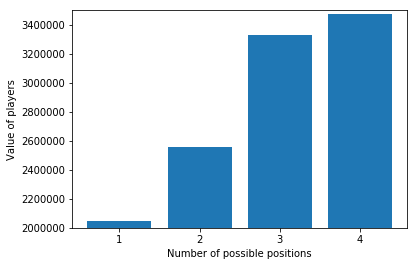

In [14]:
#Versatility and value
skill_versatility = {1: [0, 0], 2: [0, 0], 3: [0, 0], 4: [0, 0]}
average = {1: 0, 2: 0, 3: 0, 4: 0}

def sum_values(series):
    preferred_position_list = re.sub("[^\w]", " ",  series[0]).split() #Split the preferred positions
    skill_count = len(preferred_position_list)
    value = series[1]

    #Count the players per versatility
    if (skill_count in skill_versatility):
        skill_versatility[skill_count][0] += 1
        skill_versatility[skill_count][1] += value  
                    
position_value = processed_df[['Preferred Positions', 'Value']]
position_value.apply(sum_values, 1)

#Average the players value per position count
for count in skill_versatility:
    average[count] = skill_versatility[count][1] / skill_versatility[count][0]

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.bar(range(len(average)), list(average.values()))
plt.xticks(range(len(average)), list(average.keys()))
plt.xlabel('Number of possible positions')
plt.ylabel('Value of players')
ax.set(ylim=(2000000, 3500000))
plt.show()

<Figure size 432x288 with 0 Axes>

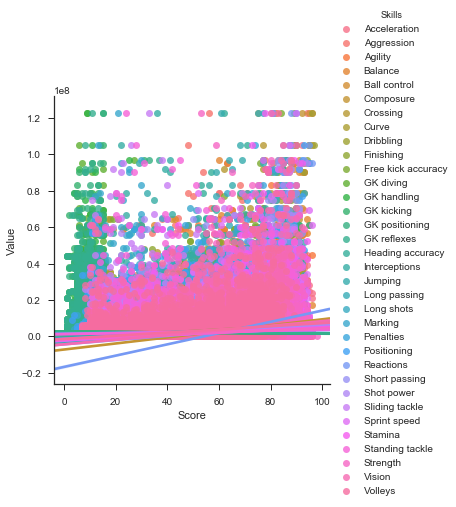

In [15]:
#Player value per skill
fig = plt.figure(figsize=(6,4))
sns.set(style="ticks")
test = pd.DataFrame(np.c_[processed_df['Value'], processed_df['Acceleration'], processed_df['Aggression'], processed_df['Agility'], processed_df['Balance'],
                          processed_df['Ball control'], processed_df['Composure'],processed_df["Crossing"],processed_df['Curve'], processed_df['Dribbling'],
                          processed_df['Finishing'], processed_df['Free kick accuracy'], processed_df['GK diving'], processed_df['GK handling'], processed_df['GK kicking'],
                          processed_df['GK positioning'], processed_df['GK reflexes'], processed_df['Heading accuracy'], processed_df['Interceptions'], processed_df['Jumping'],
                          processed_df['Long passing'], processed_df['Long shots'], processed_df['Marking'], processed_df['Penalties'], processed_df['Positioning'],
                          processed_df['Reactions'], processed_df['Short passing'], processed_df['Shot power'], processed_df['Sliding tackle'], processed_df['Sprint speed'], 
                          processed_df['Stamina'], processed_df['Standing tackle'], processed_df['Strength'], processed_df['Vision'], processed_df['Volleys'] ], 
                    columns=["Value", "Acceleration", "Aggression", "Agility", "Balance", "Ball control", "Composure", "Crossing", "Curve", "Dribbling", "Finishing", "Free kick accuracy", "GK diving",
                             "GK handling", "GK kicking", "GK positioning", "GK reflexes", "Heading accuracy", "Interceptions", "Jumping", "Long passing", "Long shots", "Marking", "Penalties", "Positioning",
                             "Reactions", "Short passing", "Shot power", "Sliding tackle", "Sprint speed", "Stamina", "Standing tackle", "Strength", "Vision","Volleys"])
test = test.melt('Value', var_name='Skills',  value_name='Score')
g = sns.lmplot(y="Value", x="Score", hue='Skills', data=test)
plt.show()

<Figure size 432x288 with 0 Axes>

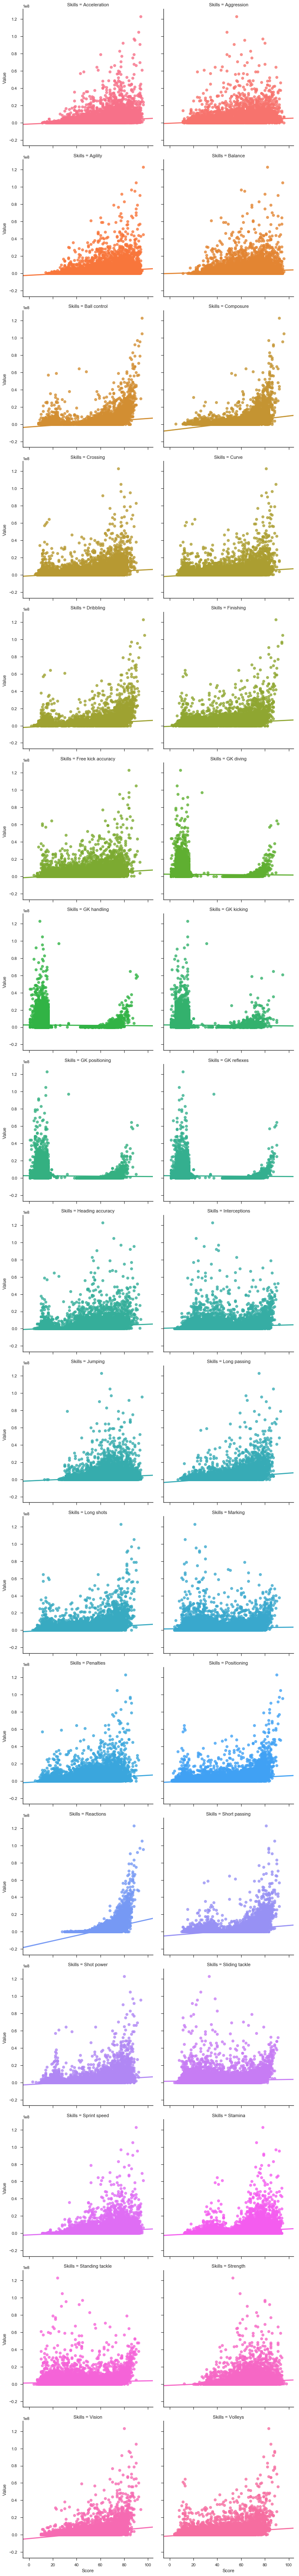

In [16]:
#Player value per skill
fig = plt.figure(figsize=(6,4))
sns.set(style="ticks")
test = pd.DataFrame(np.c_[processed_df['Value'], processed_df['Acceleration'], processed_df['Aggression'], processed_df['Agility'], processed_df['Balance'],
                          processed_df['Ball control'], processed_df['Composure'],processed_df["Crossing"],processed_df['Curve'], processed_df['Dribbling'],
                          processed_df['Finishing'], processed_df['Free kick accuracy'], processed_df['GK diving'], processed_df['GK handling'], processed_df['GK kicking'],
                          processed_df['GK positioning'], processed_df['GK reflexes'], processed_df['Heading accuracy'], processed_df['Interceptions'], processed_df['Jumping'],
                          processed_df['Long passing'], processed_df['Long shots'], processed_df['Marking'], processed_df['Penalties'], processed_df['Positioning'],
                          processed_df['Reactions'], processed_df['Short passing'], processed_df['Shot power'], processed_df['Sliding tackle'], processed_df['Sprint speed'], 
                          processed_df['Stamina'], processed_df['Standing tackle'], processed_df['Strength'], processed_df['Vision'], processed_df['Volleys'] ], 
                    columns=["Value", "Acceleration", "Aggression", "Agility", "Balance", "Ball control", "Composure", "Crossing", "Curve", "Dribbling", "Finishing", "Free kick accuracy", "GK diving",
                             "GK handling", "GK kicking", "GK positioning", "GK reflexes", "Heading accuracy", "Interceptions", "Jumping", "Long passing", "Long shots", "Marking", "Penalties", "Positioning",
                             "Reactions", "Short passing", "Shot power", "Sliding tackle", "Sprint speed", "Stamina", "Standing tackle", "Strength", "Vision","Volleys"])
test = test.melt('Value', var_name='Skills',  value_name='Score')
g = sns.lmplot(y="Value", x="Score", hue='Skills', col="Skills", data=test, col_wrap=2)
plt.show()

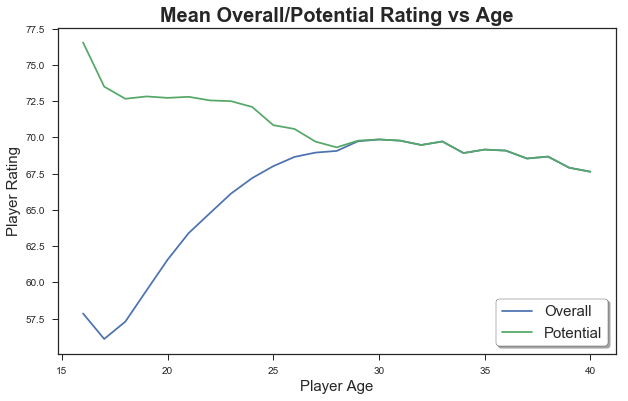

In [17]:
#Age and quality
#Age and potential
# Selecting players with age smaller then 40 
dataset = processed_df.loc[processed_df['Age'] <= 40]
# Selecting unique Age from DataFrame
age = dataset.sort_values("Age")['Age'].unique()
# Selecting mean Overall from DataFrame
overall = dataset.groupby("Age")["Overall"].mean().values
# Selecting mean Potential from DataFrame
potential = dataset.groupby("Age")["Potential"].mean().values

plt.figure(figsize=(10,6))
plt.title('Mean Overall/Potential Rating vs Age', fontsize=20, fontweight='bold')
plt.xlabel('Player Age', fontsize=15)
plt.ylabel('Player Rating', fontsize=15)
sns.set_style("whitegrid")
plt.plot(age, overall, label="Overall")
plt.plot(age, potential, label="Potential")
plt.legend(loc=4, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

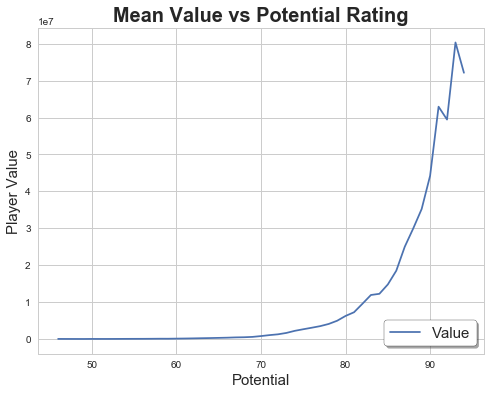

In [18]:
#Potential and Value
# Selecting unique Age from DataFrame
potential = dataset.sort_values("Potential")['Potential'].unique()
# Selecting mean Overall from DataFrame
overall = dataset.sort_values("Overall")['Overall'].unique()
# Selecting mean value from DataFrame
value = dataset.groupby("Potential")["Value"].mean().values

plt.figure(figsize=(8,6))
plt.title('Mean Value vs Potential Rating', fontsize=20, fontweight='bold')
plt.xlabel('Potential', fontsize=15)
plt.ylabel('Player Value', fontsize=15)
sns.set_style("whitegrid")
plt.plot(potential, value, label="Value")
plt.legend(loc=4, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()


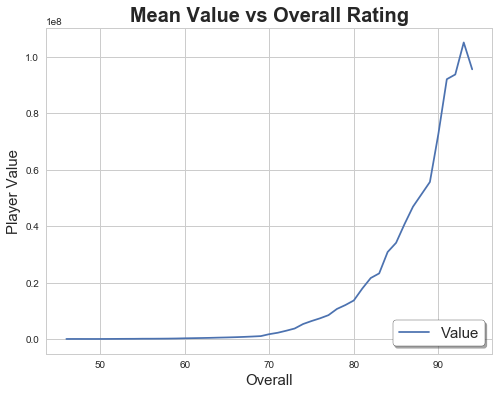

In [19]:
#Overall and Value
# Selecting unique Age from DataFrame
overall = dataset.sort_values("Overall")['Overall'].unique()
# Selecting mean Overall from DataFrame
value = dataset.groupby("Overall")["Value"].mean().values

plt.figure(figsize=(8,6))
plt.title('Mean Value vs Overall Rating', fontsize=20, fontweight='bold')
plt.xlabel('Overall', fontsize=15)
plt.ylabel('Player Value', fontsize=15)
sns.set_style("whitegrid")
plt.plot(overall, value, label="Value")
plt.legend(loc=4, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

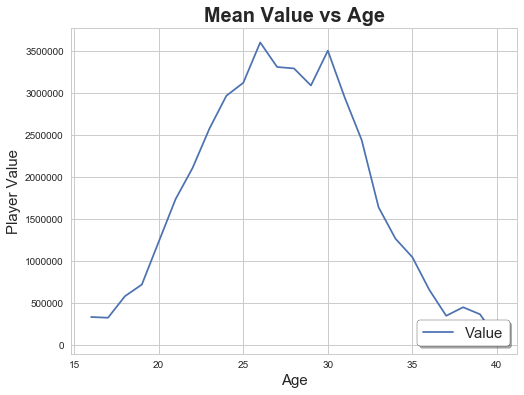

In [20]:
#Age and value
# Selecting unique Age from DataFrame
age = dataset.sort_values("Age")['Age'].unique()
# Selecting mean Overall from DataFrame
value = dataset.groupby("Age")["Value"].mean().values

plt.figure(figsize=(8,6))
plt.title('Mean Value vs Age', fontsize=20, fontweight='bold')
plt.xlabel('Age', fontsize=15)
plt.ylabel('Player Value', fontsize=15)
sns.set_style("whitegrid")
plt.plot(age, value, label="Value")
plt.legend(loc=4, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

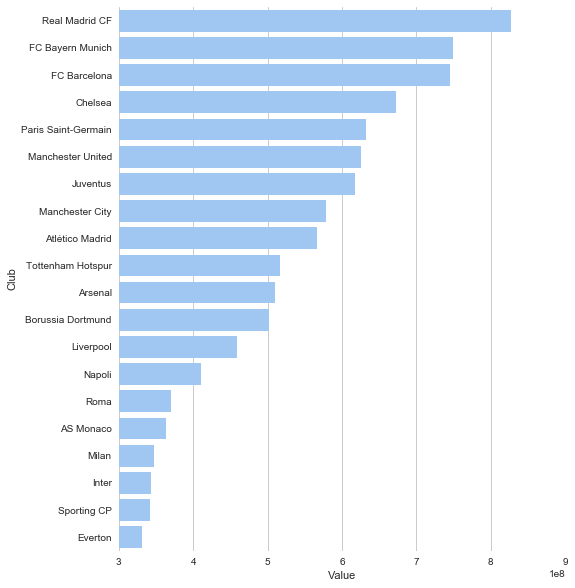

In [21]:
#Team value
club_value = dataset.groupby("Club")["Value"].sum()
club_value = club_value.reset_index()

sns.set(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 10))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(y=club_value.nlargest(20, "Value")["Club"], x=club_value.nlargest(20, "Value")["Value"], data=club_value,
            label="Total", color="b")
ax.set(xlim=(3e8, 9e8))

sns.despine(left=True, bottom=True)

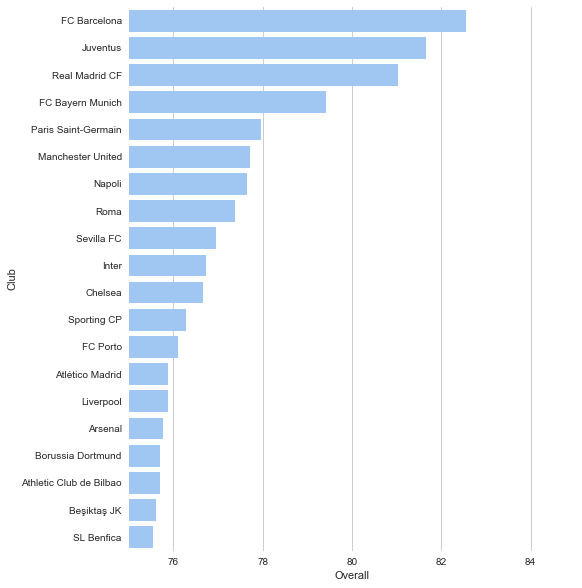

In [22]:
#Team quality
club_overall = dataset.groupby("Club")["Overall"].mean()
club_overall = club_overall.reset_index()

sns.set(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 10))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(y=club_overall.nlargest(20, "Overall")["Club"], x=club_overall.nlargest(20, "Overall")["Overall"], data=club_overall,
            label="Total", color="b")
ax.set(xlim=(75, 85))
sns.despine(left=True, bottom=True)

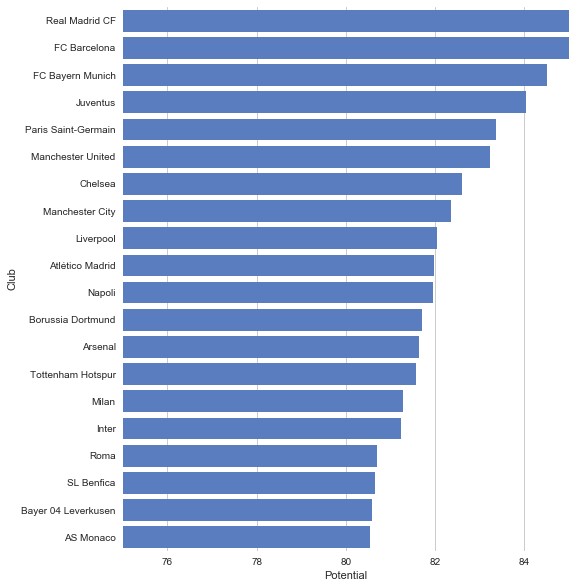

In [23]:
#Team potential
club_potential = dataset.groupby("Club")["Potential"].mean()
club_potential = club_potential.reset_index()

sns.set(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 10))

# Plot the total crashes
sns.set_color_codes("muted")
sns.barplot(y=club_potential.nlargest(20, "Potential")["Club"], x=club_potential.nlargest(20, "Potential")["Potential"], data=club_potential,
            label="Total", color="b")
ax.set(xlim=(75, 85))
sns.despine(left=True, bottom=True)

In [24]:
#Average player overall score per country
country_overall = dataset.groupby("Nationality")["Overall"].mean()
country_overall = country_overall.reset_index()

data = [ dict(
        type = 'choropleth',
        locationmode = "country names",
        locations = country_overall['Nationality'],
        z = country_overall['Overall'],
        colorscale = [[55,"rgb(5, 10, 172)"],[59,"rgb(40, 60, 190)"],[63,"rgb(70, 100, 245)"],\
            [67,"rgb(90, 120, 245)"],[71,"rgb(106, 137, 247)"],[75,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            title = 'Average<br>Overall Score'),
      ) ]

layout = dict(
    title = 'Player Quality',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~Fournierp/0 or inside your plot.ly account where it is named 'd3-world-map'


In [25]:
#Average player potential score per country
country_potential = dataset.groupby("Nationality")["Potential"].mean()
country_potential = country_potential.reset_index()

data = [ dict(
        type = 'choropleth',
        locationmode = "country names",
        locations = country_potential['Nationality'],
        z = country_potential['Potential'],
        colorscale = [[65,"rgb(5, 10, 172)"],[67,"rgb(40, 60, 190)"],[69,"rgb(70, 100, 245)"],\
            [71,"rgb(90, 120, 245)"],[73,"rgb(106, 137, 247)"],[75,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            title = 'Average<br>Potential Score'),
      ) ]

layout = dict(
    title = 'Player Potential',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map-potential' )

<Figure size 936x936 with 0 Axes>

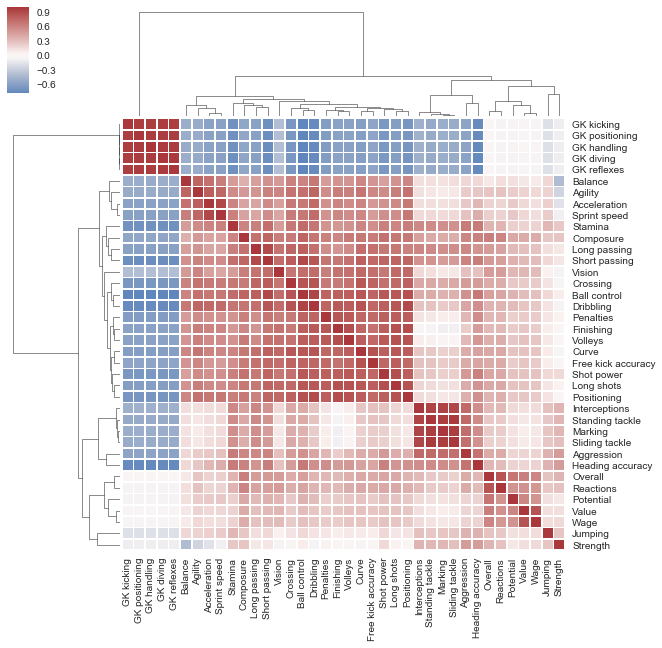

In [26]:
#Heatmap: show the correlation between similar features.
# Select a subset of the df
used_variables = ['Overall', 'Potential',
       'Value', 'Wage', 'Acceleration', 'Aggression', 'Agility', 'Balance',
       'Ball control', 'Composure', 'Crossing', 'Curve', 'Dribbling',
       'Finishing', 'Free kick accuracy', 'GK diving', 'GK handling',
       'GK kicking', 'GK positioning', 'GK reflexes', 'Heading accuracy',
       'Interceptions', 'Jumping', 'Long passing', 'Long shots', 'Marking',
       'Penalties', 'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys']
used_columns = (processed_df.columns.get_level_values(None).isin(used_variables))
df = processed_df.loc[:, used_columns]

# Draw the full plot
plt.figure(figsize=(13,13))
sns.clustermap(df.corr(), center=0, cmap="vlag", linewidths=.75)


<Figure size 936x936 with 0 Axes>

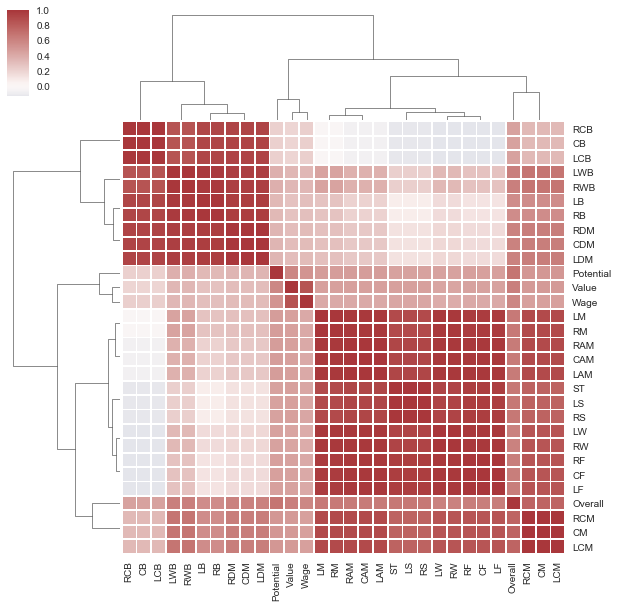

In [27]:
#Heatmap
# Select a subset of the df
used_variables = ['Overall', 'Potential', 'Value', 'Wage', 'CAM',
                  'CB', 'CDM', 'CF', 'CM', 'LAM', 'LB', 'LCB', 'LCM',
                  'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB','RAM', 'RB',
                  'RCB', 'RCM', 'RDM', 'RF', 'RM', 'RS', 'RW', 'RWB', 'ST']
used_columns = (processed_df.columns.get_level_values(None).isin(used_variables))
df = processed_df.loc[:, used_columns]

# Draw the full plot
plt.figure(figsize=(13,13))
sns.clustermap(df.corr(), center=0, cmap="vlag", linewidths=.75)

# Model

## Value

In [28]:
preprocessed_df = processed_df.copy()
preprocessed_df = preprocessed_df.drop(['Name', 'id', 'Nationality', 'Club'], 1)

In [29]:
#Separate x and y
y_value = preprocessed_df['Value'].copy()
y_wage = preprocessed_df['Wage'].copy()
preprocessed_df = preprocessed_df.drop(['Value', 'Wage'], 1)

In [30]:
#Manually one hot encode Preferred Positions
#Take all the possible positions
all_pos = set(sum([x.strip().split(" ") for x in list(set(preprocessed_df['Preferred Positions']))], []))

preferred_position = preprocessed_df['Preferred Positions']
#For each possible position
for p in all_pos:
    #Create a new series indicating whether the player plays that position
    s = pd.Series()
    #Go through the Preferred Position column
    for player in preferred_position:
        #Mark the column as 1 if the player can play the position and 0 else
        preferred_position_list = re.sub("[^\w]", " ",  player).split() #Split the preferred positions
        if(p in preferred_position_list):
            s1 = pd.Series([1])
            s = s.append(s1, ignore_index=True)
        else:
            s1 = pd.Series([0])
            s = s.append(s1, ignore_index=True)
    preprocessed_df["preferred_" + p] = s

preprocessed_df = preprocessed_df.drop(['Preferred Positions'], 1)

In [31]:
#Train-Test split
X_train_value, X_test_value, y_train_value, y_test_value = train_test_split(preprocessed_df, y_value, test_size=0.2)
X_train_wage, X_test_wage, y_train_wage, y_test_wage = train_test_split(preprocessed_df, y_wage, test_size=0.2)

In [32]:
#Create permutations of different hyperparameter combinations
num_boost_round = 999
early_stopping_rounds = 10

xgb_params = {
                'n_estimators':[500],
                # Other parameters
                'objective':['reg:linear'],
                'eval_metric':[ ["rmse" ,"mae"]],
                'min_child_weight': [1],
                'eta': [0.01, 0.1], #Learning rate
                'gamma': [0.05, 0.1], #Minimum acceptable entropy improvement to perform a split
                #Bias\variance tradeoff knobs
                'subsample': [0.8, 1.0],
                'colsample_bytree': [0.8, 1.0],
                'max_depth': [3, 6]
              }

params_perms = [dict(zip(xgb_params, v)) for v in product(*xgb_params.values())]
print(len(params_perms))
print(params_perms[0])

32
{'n_estimators': 500, 'objective': 'reg:linear', 'eval_metric': ['rmse', 'mae'], 'min_child_weight': 1, 'eta': 0.01, 'gamma': 0.05, 'subsample': 0.8, 'colsample_bytree': 0.8, 'max_depth': 3}


In [33]:
dtrain_value = xgb.DMatrix(X_train_value, label=y_train_value)
dtest_value = xgb.DMatrix(X_test_value, label=y_test_value)

In [34]:
evaluation_set_value = [(dtest_value, "Test_set")]

### Create Baseline Model for Comparison (Average)

In [35]:
mean_train_value = np.mean(y_train_value)

# Get predictions on the test set
baseline_predictions_value = np.ones(y_test_value.shape) * mean_train_value

# Compute MAE
mae_baseline_value = mean_absolute_error(y_test_value, baseline_predictions_value)

# Compute RMSE
rmse_baseline_value = sqrt(mean_squared_error(y_test_value, baseline_predictions_value))

print("Baseline MAE is {:.2f}".format(mae_baseline_value))
print("Baseline RMSE is {:.2f}".format(rmse_baseline_value))

Baseline MAE is 2729141.55
Baseline RMSE is 5443014.60


In [36]:
average_guess_error_value = np.abs(processed_df['Value'] - processed_df['Value'].mean()).mean()
print("Avergage guess error: ", average_guess_error_value)

Avergage guess error:  2702954.576802654


### Grid Search for Best Parameters

In [37]:
best_score_value = mae_baseline_value
best_params_value = {}
for i, grid_search_value in enumerate(params_perms):
    print("Permutation number:", i+1)
    cv_results_value = xgb.cv(grid_search_value,
                        dtrain_value,
                        num_boost_round=num_boost_round,
                        seed=42,
                        nfold=2,
                        metrics={'mae'},
                        early_stopping_rounds=early_stopping_rounds
                        )
    
    mean_mae_value = cv_results_value['test-mae-mean'].min()
    boost_rounds_value = cv_results_value['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae_value, boost_rounds_value))
    if mean_mae_value < best_score_value:
        best_score_value = mean_mae_value
        best_params_value = grid_search_value

Permutation number: 1


/Users/paulfournier/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning:

'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.



	MAE 241318.78125 for 998 rounds
Permutation number: 2
	MAE 182914.75 for 998 rounds
Permutation number: 3
	MAE 235807.65625 for 998 rounds
Permutation number: 4
	MAE 173857.6015625 for 997 rounds
Permutation number: 5
	MAE 240678.8671875 for 998 rounds
Permutation number: 6
	MAE 192904.296875 for 998 rounds
Permutation number: 7
	MAE 235476.40625 for 998 rounds
Permutation number: 8
	MAE 188050.546875 for 998 rounds
Permutation number: 9
	MAE 241318.78125 for 998 rounds
Permutation number: 10
	MAE 182914.75 for 998 rounds
Permutation number: 11
	MAE 235807.65625 for 998 rounds
Permutation number: 12
	MAE 173857.6015625 for 997 rounds
Permutation number: 13
	MAE 240678.8671875 for 998 rounds
Permutation number: 14
	MAE 192904.296875 for 998 rounds
Permutation number: 15
	MAE 235476.40625 for 998 rounds
Permutation number: 16
	MAE 188050.546875 for 998 rounds
Permutation number: 17
	MAE 208157.3515625 for 585 rounds
Permutation number: 18
	MAE 191561.5625 for 228 rounds
Permutation numb

In [38]:
print("Best Score:", best_score_value)
print("Best Parameters:", best_params_value)

Best Score: 173857.6015625
Best Parameters: {'n_estimators': 500, 'objective': 'reg:linear', 'eval_metric': ['rmse', 'mae'], 'min_child_weight': 1, 'eta': 0.01, 'gamma': 0.05, 'subsample': 0.8, 'colsample_bytree': 1.0, 'max_depth': 6}


### Retrain the Model with the Best Parameters

In [39]:
#Retrain a model with new best params
model_value = xgb.train(
    best_params_value,
    dtrain_value,
    num_boost_round=num_boost_round,
    evals=evaluation_set_value,
    early_stopping_rounds=early_stopping_rounds
)

[0]	Test_set-rmse:5.88907e+06	Test_set-mae:2.3622e+06
Multiple eval metrics have been passed: 'Test_set-mae' will be used for early stopping.

Will train until Test_set-mae hasn't improved in 10 rounds.
[1]	Test_set-rmse:5.83591e+06	Test_set-mae:2.33954e+06
[2]	Test_set-rmse:5.78195e+06	Test_set-mae:2.31678e+06
[3]	Test_set-rmse:5.72893e+06	Test_set-mae:2.29435e+06
[4]	Test_set-rmse:5.67793e+06	Test_set-mae:2.27233e+06
[5]	Test_set-rmse:5.62801e+06	Test_set-mae:2.25063e+06
[6]	Test_set-rmse:5.57172e+06	Test_set-mae:2.22808e+06
[7]	Test_set-rmse:5.52177e+06	Test_set-mae:2.20699e+06
[8]	Test_set-rmse:5.47368e+06	Test_set-mae:2.186e+06
[9]	Test_set-rmse:5.42157e+06	Test_set-mae:2.16455e+06
[10]	Test_set-rmse:5.37101e+06	Test_set-mae:2.14349e+06
[11]	Test_set-rmse:5.32231e+06	Test_set-mae:2.12292e+06
[12]	Test_set-rmse:5.2757e+06	Test_set-mae:2.10282e+06
[13]	Test_set-rmse:5.22931e+06	Test_set-mae:2.08291e+06
[14]	Test_set-rmse:5.18288e+06	Test_set-mae:2.06302e+06
[15]	Test_set-rmse:5.1331

[149]	Test_set-rmse:1.64937e+06	Test_set-mae:587183
[150]	Test_set-rmse:1.63785e+06	Test_set-mae:582152
[151]	Test_set-rmse:1.62649e+06	Test_set-mae:577254
[152]	Test_set-rmse:1.61407e+06	Test_set-mae:572211
[153]	Test_set-rmse:1.60246e+06	Test_set-mae:567286
[154]	Test_set-rmse:1.59176e+06	Test_set-mae:562596
[155]	Test_set-rmse:1.57985e+06	Test_set-mae:557850
[156]	Test_set-rmse:1.56819e+06	Test_set-mae:553128
[157]	Test_set-rmse:1.55715e+06	Test_set-mae:548479
[158]	Test_set-rmse:1.54589e+06	Test_set-mae:543956
[159]	Test_set-rmse:1.53441e+06	Test_set-mae:539454
[160]	Test_set-rmse:1.52578e+06	Test_set-mae:535170
[161]	Test_set-rmse:1.5171e+06	Test_set-mae:530900
[162]	Test_set-rmse:1.50703e+06	Test_set-mae:526592
[163]	Test_set-rmse:1.49671e+06	Test_set-mae:522209
[164]	Test_set-rmse:1.48767e+06	Test_set-mae:518038
[165]	Test_set-rmse:1.47769e+06	Test_set-mae:513833
[166]	Test_set-rmse:1.46803e+06	Test_set-mae:509537
[167]	Test_set-rmse:1.45917e+06	Test_set-mae:505464
[168]	Test_se

[314]	Test_set-rmse:878784	Test_set-mae:213000
[315]	Test_set-rmse:877830	Test_set-mae:212328
[316]	Test_set-rmse:876919	Test_set-mae:211688
[317]	Test_set-rmse:876419	Test_set-mae:211042
[318]	Test_set-rmse:875583	Test_set-mae:210310
[319]	Test_set-rmse:874801	Test_set-mae:209666
[320]	Test_set-rmse:873571	Test_set-mae:208978
[321]	Test_set-rmse:872646	Test_set-mae:208189
[322]	Test_set-rmse:871904	Test_set-mae:207583
[323]	Test_set-rmse:870812	Test_set-mae:207014
[324]	Test_set-rmse:870171	Test_set-mae:206415
[325]	Test_set-rmse:869432	Test_set-mae:205796
[326]	Test_set-rmse:869134	Test_set-mae:205191
[327]	Test_set-rmse:868229	Test_set-mae:204457
[328]	Test_set-rmse:867459	Test_set-mae:203891
[329]	Test_set-rmse:866858	Test_set-mae:203263
[330]	Test_set-rmse:866479	Test_set-mae:202710
[331]	Test_set-rmse:865856	Test_set-mae:202100
[332]	Test_set-rmse:865206	Test_set-mae:201564
[333]	Test_set-rmse:864395	Test_set-mae:200952
[334]	Test_set-rmse:863840	Test_set-mae:200427
[335]	Test_se

[489]	Test_set-rmse:849429	Test_set-mae:166240
[490]	Test_set-rmse:849531	Test_set-mae:166248
[491]	Test_set-rmse:849717	Test_set-mae:166204
[492]	Test_set-rmse:849859	Test_set-mae:166073
[493]	Test_set-rmse:849817	Test_set-mae:165956
[494]	Test_set-rmse:850156	Test_set-mae:165916
[495]	Test_set-rmse:850421	Test_set-mae:165853
[496]	Test_set-rmse:850854	Test_set-mae:165830
[497]	Test_set-rmse:851114	Test_set-mae:165763
[498]	Test_set-rmse:851341	Test_set-mae:165707
[499]	Test_set-rmse:851644	Test_set-mae:165664
[500]	Test_set-rmse:851709	Test_set-mae:165580
[501]	Test_set-rmse:851945	Test_set-mae:165493
[502]	Test_set-rmse:852131	Test_set-mae:165412
[503]	Test_set-rmse:852432	Test_set-mae:165350
[504]	Test_set-rmse:852448	Test_set-mae:165281
[505]	Test_set-rmse:852657	Test_set-mae:165207
[506]	Test_set-rmse:852674	Test_set-mae:165126
[507]	Test_set-rmse:852745	Test_set-mae:165069
[508]	Test_set-rmse:852857	Test_set-mae:164997
[509]	Test_set-rmse:853145	Test_set-mae:164962
[510]	Test_se

### Evaluate the Model

In [40]:
print("Average guess error", average_guess_error_value)
print("vs Mean Absolute Error", mean_absolute_error(model_value.predict(dtest_value), y_test_value))

Average guess error 2702954.576802654
vs Mean Absolute Error 161345.49697976938


### Model Summary

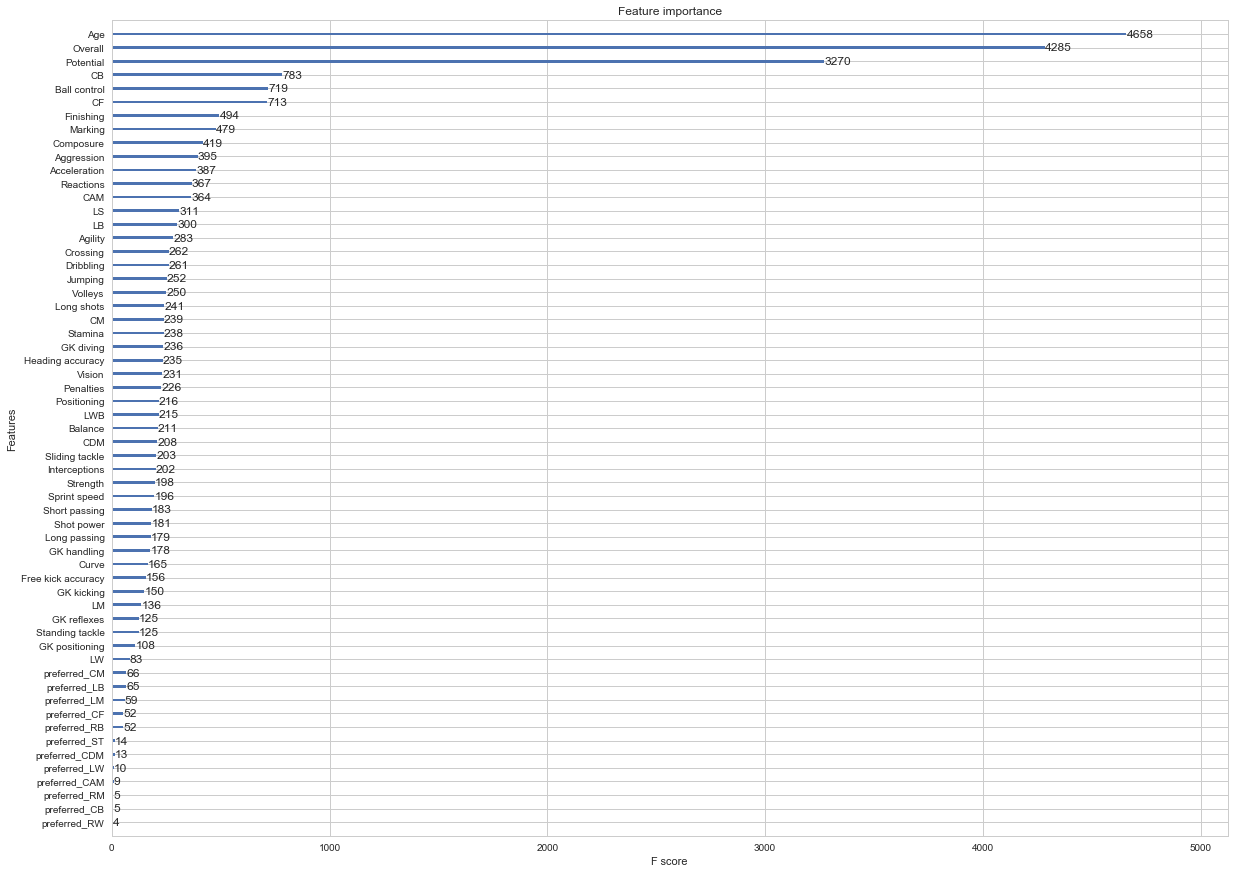

In [41]:
#Feature Importance
plt.figure(figsize=(20,15))
xgb.plot_importance(model_value, ax=plt.gca())

ValueError: Unable to parse node: 49:[Heading

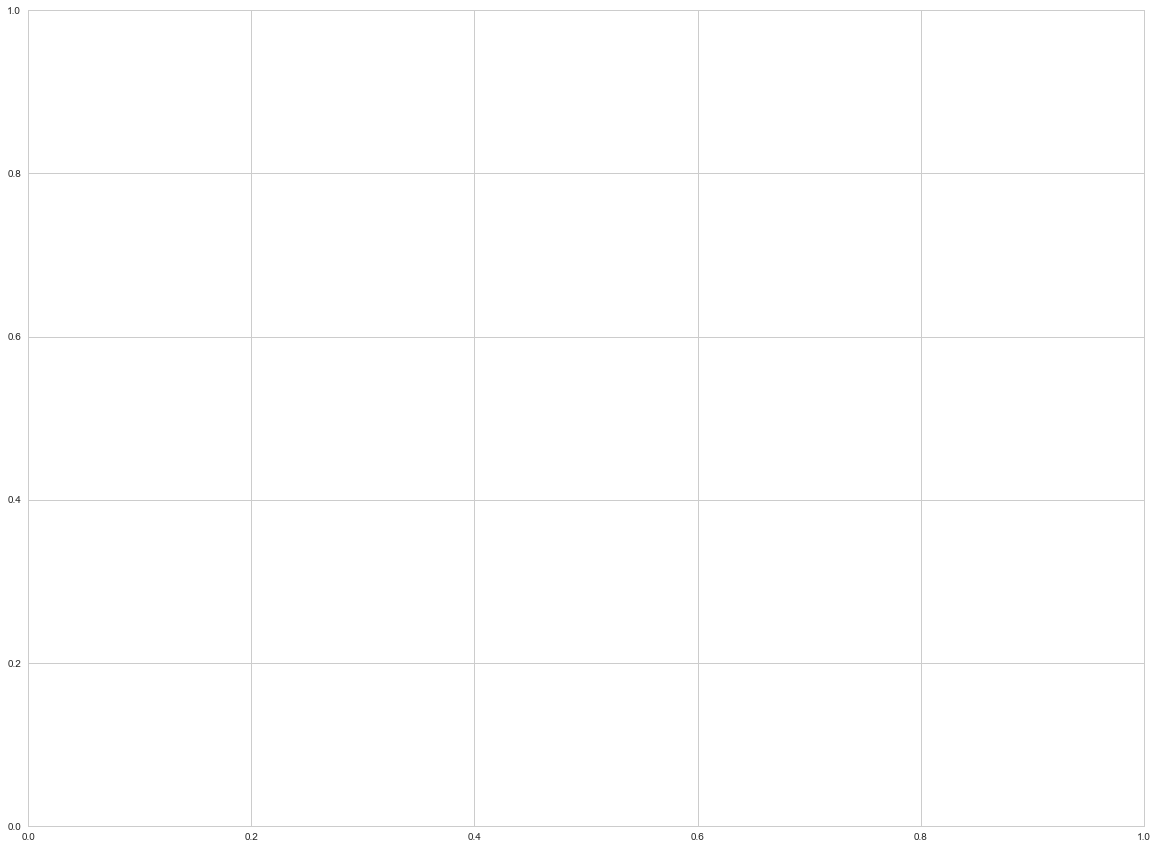

In [77]:
#Tree Diagram
plt.figure(figsize=(20,15))
xgb.plot_tree(model_value, ax=plt.gca())

### Predictions

In [44]:
#Predict the value based on the model.
dpred_value = xgb.DMatrix(preprocessed_df, label = y_value)
y_pred = pd.Series(model_value.predict(dpred_value))

In [53]:
#Top 10% players with overpriced transfer values.
sub_value = y_value.subtract(y_pred)
exp_value = sub_value.nlargest(int(len(sub_value)/1000))
exp_value = processed_df.loc[exp_value.index]
exp_value

,id,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Acceleration,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
5,5,R. Lewandowski,28,Poland,91,91,FC Bayern Munich,92000000.0,355000.0,79.0,...,58.0,57.0,78.0,62.0,87.0,82.0,88.0,84.0,61.0,88.0
183,183,M. Dembélé,29,Belgium,83,83,Tottenham Hotspur,25000000.0,115000.0,75.0,...,76.0,78.0,81.0,80.0,79.0,79.0,77.0,78.0,77.0,77.0
2,2,Neymar,25,Brazil,92,94,Paris Saint-Germain,123000000.0,280000.0,94.0,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
111,111,Bruno,33,Spain,84,84,Villarreal CF,18500000.0,59000.0,42.0,...,74.0,78.0,82.0,82.0,74.0,72.0,71.0,71.0,75.0,71.0
186,186,L. Biglia,31,Argentina,83,83,Milan,17500000.0,105000.0,70.0,...,78.0,75.0,80.0,81.0,73.0,75.0,68.0,73.0,79.0,68.0
315,315,R. Guerreiro,23,Portugal,81,86,Borussia Dortmund,24000000.0,58000.0,83.0,...,78.0,72.0,80.0,77.0,79.0,80.0,75.0,81.0,80.0,75.0
463,463,I. Traoré,29,Guinea,80,80,Borussia Mönchengladbach,14500000.0,48000.0,92.0,...,60.0,49.0,73.0,59.0,78.0,79.0,72.0,80.0,64.0,72.0
2260,2260,A. Meret,20,Italy,74,88,Ferrara (SPAL),10500000.0,14000.0,41.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,100,M. Icardi,24,Argentina,84,89,Inter,42000000.0,105000.0,75.0,...,49.0,46.0,67.0,50.0,79.0,73.0,82.0,75.0,51.0,82.0
21,21,A. Griezmann,26,France,88,91,Atlético Madrid,75000000.0,150000.0,87.0,...,56.0,48.0,76.0,57.0,85.0,84.0,85.0,86.0,60.0,85.0


In [49]:
#Top 10% players with underpriced transfer values.
cheap_value = sub_value.nsmallest(int(len(sub_value)/1000))
cheap_value = processed_df.loc[cheap_value.index]
cheap_value

,id,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Acceleration,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
162,162,Oscar,25,Brazil,83,86,NaN,0.0,0.0,75.0,...,61.0,49.0,77.0,61.0,80.0,79.0,74.0,79.0,64.0,74.0
45,45,Iniesta,33,Spain,87,87,FC Barcelona,29500000.0,260000.0,72.0,...,69.0,63.0,84.0,74.0,83.0,84.0,76.0,84.0,72.0,76.0
32,32,A. Robben,33,Netherlands,88,88,FC Bayern Munich,36000000.0,225000.0,87.0,...,58.0,47.0,78.0,59.0,86.0,85.0,82.0,87.0,63.0,82.0
31,31,Z. Ibrahimović,35,Sweden,88,88,Manchester United,27000000.0,240000.0,63.0,...,54.0,52.0,78.0,60.0,83.0,80.0,84.0,82.0,58.0,84.0
1402,1402,P. Tau,23,South Africa,76,78,NaN,0.0,0.0,79.0,...,52.0,41.0,67.0,51.0,75.0,74.0,71.0,76.0,56.0,71.0
37,37,A. Vidal,30,Chile,87,87,FC Bayern Munich,37500000.0,160000.0,76.0,...,83.0,84.0,83.0,85.0,81.0,80.0,81.0,80.0,83.0,81.0
33,33,N. Kanté,26,France,87,90,Chelsea,52500000.0,190000.0,82.0,...,82.0,81.0,81.0,84.0,76.0,78.0,72.0,76.0,83.0,72.0
91,91,A. Barzagli,36,Italy,85,85,Juventus,5000000.0,105000.0,64.0,...,75.0,83.0,63.0,76.0,55.0,57.0,53.0,55.0,71.0,53.0
39,39,Marcelo,29,Brazil,87,87,Real Madrid CF,38000000.0,250000.0,77.0,...,84.0,82.0,80.0,82.0,79.0,81.0,77.0,80.0,84.0,77.0
944,944,B. Dočkal,28,Czech Republic,77,77,NaN,0.0,0.0,68.0,...,61.0,55.0,74.0,63.0,75.0,75.0,71.0,75.0,64.0,71.0


In [54]:
pkl_filename = "pickle_model_value.pkl"  
with open(pkl_filename, 'wb') as file:  
    pickle.dump(model_value, file)

In [56]:
model_value.save_model("pickle_model_value.model")

## Wage

In [57]:
dtrain_wage = xgb.DMatrix(X_train_wage, label=y_train_wage)
dtest_wage = xgb.DMatrix(X_test_wage, label=y_test_wage)
evaluation_set_wage = [(dtest_wage, "Test_set")]

### Create Baseline Model for Comparison (Average)

In [58]:
mean_train_wage = np.mean(y_train_wage)

# Get predictions on the test set
baseline_predictions_wage = np.ones(y_test_wage.shape) * mean_train_wage

# Compute MAE
mae_baseline_wage = mean_absolute_error(y_test_wage, baseline_predictions_wage)

# Compute RMSE
rmse_baseline_wage = sqrt(mean_squared_error(y_test_wage, baseline_predictions_wage))

print("Baseline MAE is {:.2f}".format(mae_baseline_wage))
print("Baseline RMSE is {:.2f}".format(rmse_baseline_wage))

Baseline MAE is 11865.70
Baseline RMSE is 23134.04


In [59]:
average_guess_error_wage = np.abs(processed_df['Wage'] - processed_df['Wage'].mean()).mean()
print("Avergage guess error: {}".format(average_guess_error_wage))

Avergage guess error: 12006.856801158267


### Grid Search for Best Parameters

In [60]:
best_score_wage = mae_baseline_wage
best_params_wage = {}
for i, grid_search_wage in enumerate(params_perms):
    print("Permutation number:", i+1)
    cv_results_wage = xgb.cv(grid_search_wage,
                        dtrain_wage,
                        num_boost_round=num_boost_round,
                        seed=42,
                        nfold=2,
                        metrics={'mae'},
                        early_stopping_rounds=early_stopping_rounds
                        )
    
    mean_mae_wage = cv_results_wage['test-mae-mean'].min()
    boost_rounds_wage = cv_results_wage['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae_wage, boost_rounds_wage))
    if mean_mae_wage < best_score_wage:
        best_score_wage = mean_mae_wage
        best_params_wage = grid_search_wage

Permutation number: 1


/Users/paulfournier/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning:

'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.



	MAE 5639.010254 for 219 rounds
Permutation number: 2
	MAE 5516.7438965 for 234 rounds
Permutation number: 3
	MAE 5627.16626 for 212 rounds
Permutation number: 4
	MAE 5502.175537 for 220 rounds
Permutation number: 5
	MAE 5640.013183499999 for 220 rounds
Permutation number: 6
	MAE 5529.1743165 for 220 rounds
Permutation number: 7
	MAE 5624.9348145 for 223 rounds
Permutation number: 8
	MAE 5525.042969 for 247 rounds
Permutation number: 9
	MAE 5639.010254 for 219 rounds
Permutation number: 10
	MAE 5516.7438965 for 234 rounds
Permutation number: 11
	MAE 5627.16626 for 212 rounds
Permutation number: 12
	MAE 5502.175537 for 220 rounds
Permutation number: 13
	MAE 5640.013183499999 for 220 rounds
Permutation number: 14
	MAE 5529.1743165 for 220 rounds
Permutation number: 15
	MAE 5624.9348145 for 223 rounds
Permutation number: 16
	MAE 5525.042969 for 247 rounds
Permutation number: 17
	MAE 5661.9611815 for 20 rounds
Permutation number: 18
	MAE 5550.2753905 for 21 rounds
Permutation number: 19
	M

In [61]:
print("Best Score:", best_score_wage)
print("Best Parameters:", best_params_wage)

Best Score: 5502.175537
Best Parameters: {'n_estimators': 500, 'objective': 'reg:linear', 'eval_metric': ['rmse', 'mae'], 'min_child_weight': 1, 'eta': 0.01, 'gamma': 0.05, 'subsample': 0.8, 'colsample_bytree': 1.0, 'max_depth': 6}


### Retrain the Model with the Best Parameters

In [62]:
#Retrain a model with new best params
model_wage = xgb.train(
    best_params_wage,
    dtrain_wage,
    num_boost_round=num_boost_round,
    evals=evaluation_set_wage,
    early_stopping_rounds=early_stopping_rounds
)

[0]	Test_set-rmse:25577.9	Test_set-mae:11222.9
Multiple eval metrics have been passed: 'Test_set-mae' will be used for early stopping.

Will train until Test_set-mae hasn't improved in 10 rounds.
[1]	Test_set-rmse:25392.9	Test_set-mae:11117.9
[2]	Test_set-rmse:25207.2	Test_set-mae:11014.5
[3]	Test_set-rmse:25013	Test_set-mae:10909.5
[4]	Test_set-rmse:24830.9	Test_set-mae:10809.6
[5]	Test_set-rmse:24653.4	Test_set-mae:10710.9
[6]	Test_set-rmse:24471.4	Test_set-mae:10611.2
[7]	Test_set-rmse:24291.7	Test_set-mae:10512.9
[8]	Test_set-rmse:24113.4	Test_set-mae:10416.7
[9]	Test_set-rmse:23932.3	Test_set-mae:10321.4
[10]	Test_set-rmse:23755.2	Test_set-mae:10225.6
[11]	Test_set-rmse:23582.1	Test_set-mae:10131.7
[12]	Test_set-rmse:23411.1	Test_set-mae:10039.5
[13]	Test_set-rmse:23247.7	Test_set-mae:9948.42
[14]	Test_set-rmse:23087.4	Test_set-mae:9858.69
[15]	Test_set-rmse:22930.7	Test_set-mae:9771.82
[16]	Test_set-rmse:22765	Test_set-mae:9683
[17]	Test_set-rmse:22605.7	Test_set-mae:9595.52
[18]

[168]	Test_set-rmse:12291.6	Test_set-mae:5361.32
[169]	Test_set-rmse:12270.9	Test_set-mae:5358.86
[170]	Test_set-rmse:12260	Test_set-mae:5357.19
[171]	Test_set-rmse:12243.4	Test_set-mae:5355.68
[172]	Test_set-rmse:12223.4	Test_set-mae:5353.4
[173]	Test_set-rmse:12204.5	Test_set-mae:5351.25
[174]	Test_set-rmse:12185.4	Test_set-mae:5348.89
[175]	Test_set-rmse:12170.5	Test_set-mae:5348.15
[176]	Test_set-rmse:12151.3	Test_set-mae:5346.35
[177]	Test_set-rmse:12143.9	Test_set-mae:5345.76
[178]	Test_set-rmse:12127.3	Test_set-mae:5344.04
[179]	Test_set-rmse:12111.6	Test_set-mae:5342.77
[180]	Test_set-rmse:12090.5	Test_set-mae:5340.16
[181]	Test_set-rmse:12072.9	Test_set-mae:5339.02
[182]	Test_set-rmse:12056.6	Test_set-mae:5338.12
[183]	Test_set-rmse:12037.8	Test_set-mae:5335.8
[184]	Test_set-rmse:12022.1	Test_set-mae:5334.67
[185]	Test_set-rmse:12005.6	Test_set-mae:5333.28
[186]	Test_set-rmse:11988.8	Test_set-mae:5331.58
[187]	Test_set-rmse:11975.8	Test_set-mae:5329.46
[188]	Test_set-rmse:1195

### Evaluate the Model

In [64]:
print("Average guess error", average_guess_error_wage)
print("vs Mean Absolute Error", mean_absolute_error(model_wage.predict(dtest_wage), y_test_wage))

Average guess error 12006.856801158267
vs Mean Absolute Error 5302.910334858856


### Model Summary

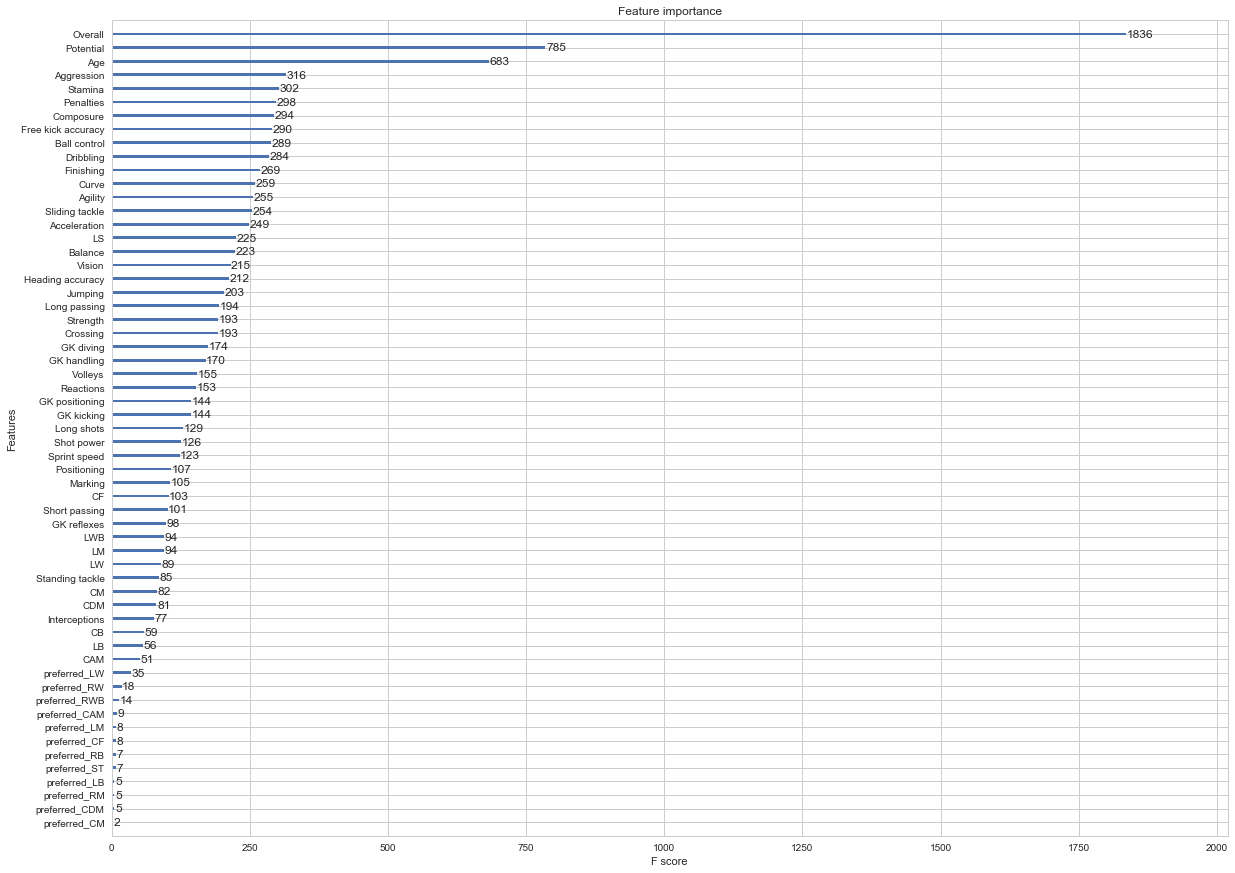

In [65]:
#Feature Importance
plt.figure(figsize=(20,15))
xgb.plot_importance(model_wage, ax=plt.gca())

ValueError: Unable to parse node: 34:[Shot

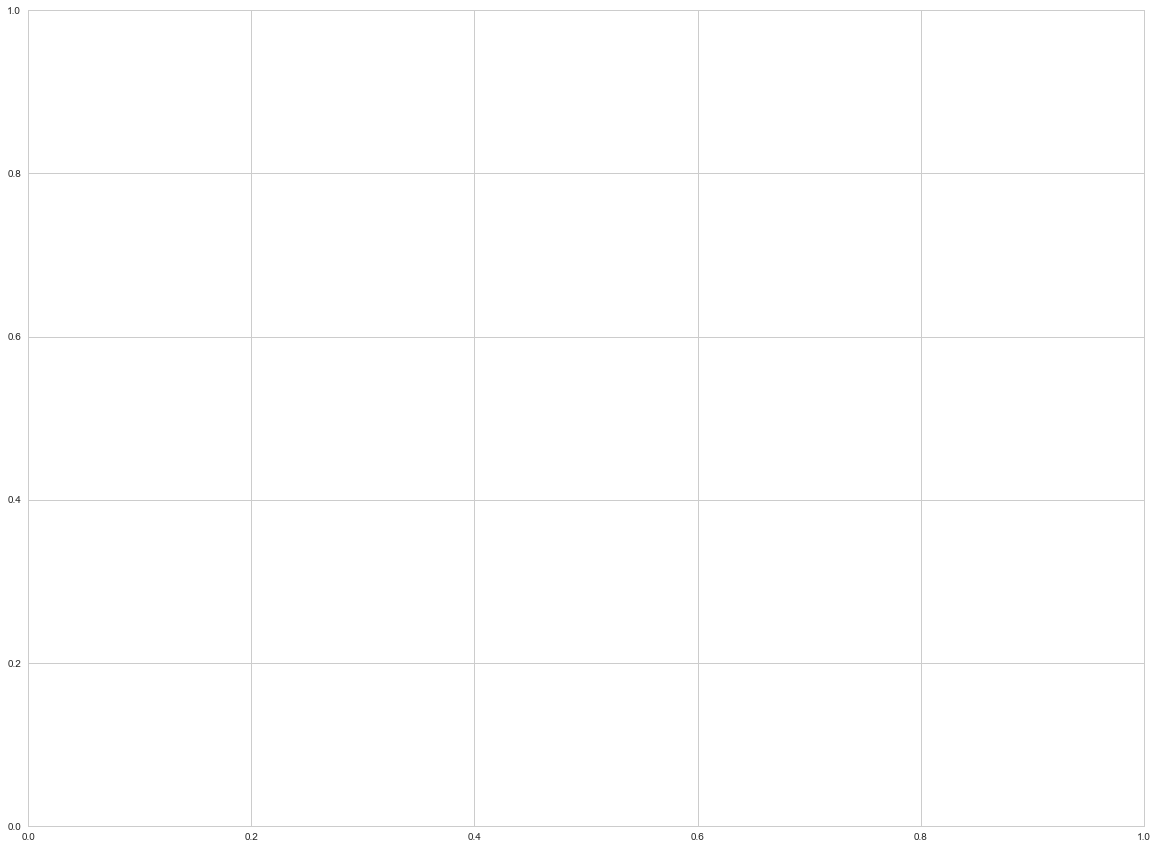

In [76]:
#Tree Diagram
plt.figure(figsize=(20,15))
xgb.plot_tree(model_wage, ax=plt.gca())

### Predictions

In [67]:
#Predict the value based on the model.
dpred_wage = xgb.DMatrix(preprocessed_df, label = y_wage)
y_pred_wage = pd.Series(model_wage.predict(dpred_wage))

In [70]:
#Top 10% players with overpriced wages.
sub_wage = y_value.subtract(y_pred_wage)
exp_wage = processed_df.loc[sub_wage.nlargest(int(len(sub_wage)/1000)).index]
exp_wage

,id,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Acceleration,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
2,2,Neymar,25,Brazil,92,94,Paris Saint-Germain,123000000.0,280000.0,94.0,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
1,1,L. Messi,30,Argentina,93,93,FC Barcelona,105000000.0,565000.0,92.0,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
3,3,L. Suárez,30,Uruguay,92,92,FC Barcelona,97000000.0,510000.0,88.0,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
0,0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,95500000.0,565000.0,89.0,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
5,5,R. Lewandowski,28,Poland,91,91,FC Bayern Munich,92000000.0,355000.0,79.0,...,58.0,57.0,78.0,62.0,87.0,82.0,88.0,84.0,61.0,88.0
7,7,E. Hazard,26,Belgium,90,91,Chelsea,90500000.0,295000.0,93.0,...,59.0,47.0,81.0,61.0,87.0,87.0,82.0,88.0,64.0,82.0
11,11,K. De Bruyne,26,Belgium,89,92,Manchester City,83000000.0,285000.0,76.0,...,66.0,57.0,84.0,70.0,85.0,85.0,81.0,85.0,71.0,81.0
19,19,P. Dybala,23,Argentina,88,93,Juventus,79000000.0,215000.0,88.0,...,55.0,43.0,78.0,55.0,86.0,86.0,83.0,87.0,60.0,83.0
8,8,T. Kroos,27,Germany,90,90,Real Madrid CF,79000000.0,340000.0,60.0,...,76.0,72.0,87.0,82.0,81.0,81.0,77.0,80.0,78.0,77.0
9,9,G. Higuaín,29,Argentina,90,90,Juventus,77000000.0,275000.0,78.0,...,51.0,46.0,71.0,52.0,84.0,79.0,87.0,82.0,55.0,87.0


In [71]:
#Top 10% players with underpriced transfer values.
cheap_wage = sub_wage.nsmallest(int(len(sub_wage)/1000))
cheap_wage = processed_df.loc[cheap_wage.index]
cheap_wage

,id,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Acceleration,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
167,167,Adrien Silva,28,Portugal,83,83,NaN,0.0,0.0,64.0,...,78.0,75.0,82.0,81.0,78.0,79.0,74.0,78.0,79.0,74.0
162,162,Oscar,25,Brazil,83,86,NaN,0.0,0.0,75.0,...,61.0,49.0,77.0,61.0,80.0,79.0,74.0,79.0,64.0,74.0
274,274,A. Witsel,28,Belgium,82,82,NaN,0.0,0.0,67.0,...,76.0,76.0,80.0,79.0,78.0,78.0,77.0,78.0,77.0,77.0
658,658,Gervinho,30,Ivory Coast,79,79,NaN,0.0,0.0,91.0,...,55.0,43.0,71.0,54.0,77.0,79.0,74.0,78.0,59.0,74.0
472,472,M. Berg,30,Sweden,80,80,NaN,0.0,0.0,74.0,...,50.0,47.0,66.0,51.0,76.0,71.0,78.0,73.0,53.0,78.0
925,925,B. Moukandjo,28,Cameroon,77,77,NaN,0.0,0.0,90.0,...,53.0,44.0,66.0,51.0,76.0,76.0,76.0,77.0,56.0,76.0
488,488,Renato Augusto,29,Brazil,80,80,NaN,0.0,0.0,66.0,...,71.0,68.0,79.0,74.0,78.0,78.0,74.0,78.0,73.0,74.0
944,944,B. Dočkal,28,Czech Republic,77,77,NaN,0.0,0.0,68.0,...,61.0,55.0,74.0,63.0,75.0,75.0,71.0,75.0,64.0,71.0
1019,1019,Gil,30,Brazil,77,77,NaN,0.0,0.0,53.0,...,70.0,76.0,65.0,74.0,57.0,58.0,57.0,55.0,68.0,57.0
1273,1273,C. Riveros,34,Paraguay,76,76,NaN,0.0,0.0,60.0,...,67.0,66.0,75.0,71.0,72.0,72.0,70.0,72.0,69.0,70.0


In [72]:
pkl_filename = "pickle_model_wage.pkl"  
with open(pkl_filename, 'wb') as file:  
    pickle.dump(model_wage, file)

In [73]:
model_wage.save_model("pickle_model_wage.model")